# FE Homework 3
**FBA Quant 이의형**

---

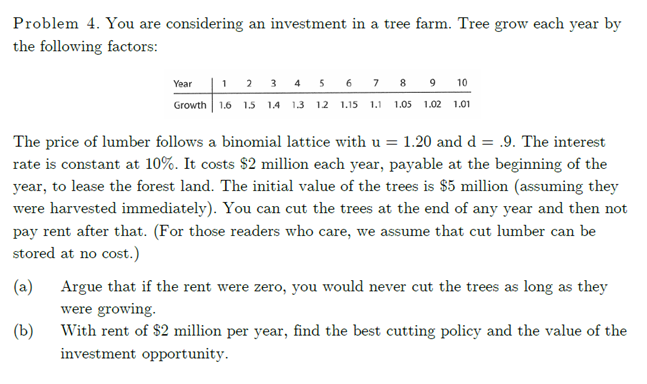

### (a)

In [1]:
import pandas as pd
import numpy as np

# 문제 정보
u = 1.2
d = 0.9
R = 1.1
q = (R - d) / (u - d)
spot_price = 5  # million
period = 10
growth = [1, 1.6, 1.5, 1.4, 1.3, 1.2, 1.15, 1.1, 1.05, 1.02, 1.01]
growth_cum = np.cumprod(growth)


# 초기 자금(500만 어치 목재)에 대한 목재의 가치 변동
df = pd.DataFrame(np.diag([spot_price * d**i for i in range(11)]))
for i in range(period+1):
    for j in range(period+1):
        if j > i:
            df.iloc[i,j] = df.iloc[i,j-1]*1.2

# 나무의 성장률 반영
df = df.mul(growth_cum)
df

,0,1,2,3,4,5,6,7,8,9,10
0,5.0,9.6,17.28,29.0304,45.287424,65.213891,89.995169,118.793623,149.679965,183.208277,222.048432
1,0.0,7.2,12.96,21.7728,33.965568,48.910418,67.496377,89.095217,112.259974,137.406208,166.536324
2,0.0,0.0,9.72,16.3296,25.474176,36.682813,50.622283,66.821413,84.194980,103.054656,124.902243
3,0.0,0.0,0.00,12.2472,19.105632,27.512110,37.966712,50.116060,63.146235,77.290992,93.676682
4,0.0,0.0,0.00,0.0000,14.329224,20.634083,28.475034,37.587045,47.359676,57.968244,70.257512
5,0.0,0.0,0.00,0.0000,0.000000,15.475562,21.356275,28.190284,35.519757,43.476183,52.693134
6,0.0,0.0,0.00,0.0000,0.000000,0.000000,16.017207,21.142713,26.639818,32.607137,39.519850
7,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,15.857035,19.979863,24.455353,29.639888
8,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,14.984898,18.341515,22.229916
9,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,13.756136,16.672437


In [2]:
# 10년 후로부터 현재가치 계산
df_pv = pd.DataFrame().reindex_like(df)
df_pv[10] = df[10]

for i in range(period-1, -1, -1):
    for j in range(period):
        if i >= j:
            p_u = df_pv.iloc[j,i+1]
            p_d = df_pv.iloc[j+1,i+1]
            df_pv.iloc[j,i] = (q*p_u + (1-q)*p_d)/R
df_pv

,0,1,2,3,4,5,6,7,8,9,10
0,35.862061,43.034474,51.641368,61.969642,74.363571,89.236285,107.083542,128.500250,154.200300,185.040360,222.048432
1,NaN,32.275855,38.731026,46.477232,55.772678,66.927214,80.312656,96.375187,115.650225,138.780270,166.536324
2,NaN,NaN,29.048270,34.857924,41.829508,50.195410,60.234492,72.281391,86.737669,104.085202,124.902243
3,NaN,NaN,NaN,26.143443,31.372131,37.646558,45.175869,54.211043,65.053252,78.063902,93.676682
4,NaN,NaN,NaN,NaN,23.529099,28.234918,33.881902,40.658282,48.789939,58.547926,70.257512
5,NaN,NaN,NaN,NaN,NaN,21.176189,25.411426,30.493712,36.592454,43.910945,52.693134
6,NaN,NaN,NaN,NaN,NaN,NaN,19.058570,22.870284,27.444340,32.933209,39.519850
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.152713,20.583255,24.699906,29.639888
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.437442,18.524930,22.229916
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.893697,16.672437


In [3]:
# 비교
df_pv < df

,0,1,2,3,4,5,6,7,8,9,10
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


10년 뒤 수익에 대해 위험중립확률로 계산한 현재가치보다 그냥 팔아버렸을 때의 수익이 큰 경우는 단 하나도 없다.  

따라서 10년간 보유하는 것이 이득이다.

또한, 1년마다 계산한 현재가치를 보더라도 결과는 아래와 같다.

In [4]:
# 다음 기간 수익에 대해서만 현재가치 계산
df_pv_1p = pd.DataFrame().reindex_like(df)
df_pv_1p[10] = df[10]

for i in range(period-1, -1, -1):
    for j in range(period):
        if i >= j:
            p_u = df.iloc[j,i+1]
            p_d = df.iloc[j+1,i+1]
            df_pv_1p.iloc[j,i] = (q*p_u + (1-q)*p_d)/R
df_pv_1p

,0,1,2,3,4,5,6,7,8,9,10
0,8.0,14.4,24.192,37.73952,54.344909,74.995974,98.994686,124.733304,152.673564,185.040360,222.048432
1,NaN,10.8,18.144,28.30464,40.758682,56.246981,74.246014,93.549978,114.505173,138.780270,166.536324
2,NaN,NaN,13.608,21.22848,30.569011,42.185235,55.684511,70.162484,85.878880,104.085202,124.902243
3,NaN,NaN,NaN,15.92136,22.926758,31.638927,41.763383,52.621863,64.409160,78.063902,93.676682
4,NaN,NaN,NaN,NaN,17.195069,23.729195,31.322537,39.466397,48.306870,58.547926,70.257512
5,NaN,NaN,NaN,NaN,NaN,17.796896,23.491903,29.599798,36.230152,43.910945,52.693134
6,NaN,NaN,NaN,NaN,NaN,NaN,17.618927,22.199848,27.172614,32.933209,39.519850
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.649886,20.379461,24.699906,29.639888
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.284596,18.524930,22.229916
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.893697,16.672437


In [5]:
# 비교
df_pv_1p < df

,0,1,2,3,4,5,6,7,8,9,10
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


마찬가지로, 1년 뒤 수익에 대해 위험중립확률로 계산한 현재가치보다 그냥 팔아버렸을 때의 수익이 큰 경우는 단 하나도 없다.  

**그러므로 매 기간 보유하는 것이 이득이다.**

### (b)

In [6]:
# 임대료가 2m인 경우: 초기 자금(500만 어치 목재)에 대한 수익의 가치 변동
df_m2 = pd.DataFrame().reindex_like(df)
for i in range(period+1):
    for j in range(period+1):
        if j >= i:
            df_m2.iloc[i,j] = df.iloc[i,j] -2*(j)
        if i == 0 and j == 0:
            df_m2.iloc[i,j] = df.iloc[i,j] -2
df_m2

,0,1,2,3,4,5,6,7,8,9,10
0,3.0,7.6,13.28,23.0304,37.287424,55.213891,77.995169,104.793623,133.679965,165.208277,202.048432
1,NaN,5.2,8.96,15.7728,25.965568,38.910418,55.496377,75.095217,96.259974,119.406208,146.536324
2,NaN,NaN,5.72,10.3296,17.474176,26.682813,38.622283,52.821413,68.194980,85.054656,104.902243
3,NaN,NaN,NaN,6.2472,11.105632,17.512110,25.966712,36.116060,47.146235,59.290992,73.676682
4,NaN,NaN,NaN,NaN,6.329224,10.634083,16.475034,23.587045,31.359676,39.968244,50.257512
5,NaN,NaN,NaN,NaN,NaN,5.475562,9.356275,14.190284,19.519757,25.476183,32.693134
6,NaN,NaN,NaN,NaN,NaN,NaN,4.017207,7.142713,10.639818,14.607137,19.519850
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.857035,3.979863,6.455353,9.639888
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.015102,0.341515,2.229916
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.243864,-3.327563


In [10]:
# n년까지 투자 시 현재가치 반환 함수
def pv_n_period(df, period, end_period, q, R):
    df_sizecut = df.iloc[:period+1, :period+1].copy()
    for i in range(period-1, -1, -1):
        for j in range(period):
            if i >= j:
                p_u = df_sizecut.iloc[j,i+1]
                p_d = df_sizecut.iloc[j+1,i+1]
                df_sizecut.iloc[j,i] = (q*p_u + (1-q)*p_d)/R
    return df_sizecut.iloc[0,0] * 1.1**(end_period - period)

In [11]:
# 0 (바로 판매)부터 10년까지의 투자수익률 계산
pv = []
for i in range(period+1):
    pv.append(pv_n_period(df_m2, i, period, q, R))
pv

[7.781227380300007,
 14.576403908000016,
 18.636821720000018,
 23.95384728000002,
 29.010892240000018,
 32.20824608000002,
 34.20944734809918,
 34.56461434488902,
 33.08945607913958,
 30.660557828224814,
 28.151195646609384]

In [15]:
print(f"보유기간: {pv.index(max(pv))}년")
print(f"수익: {max(pv):.4f} milion")

보유기간: 7년
수익: 34.5646 milion


보유 기간별로 현재가치를 계산하고 남은 기간을 무이자이자율로 적용했을 때, 가장 높은 현재가치를 갖는 것은 7년을 보유한 경우이다.

**이 때의 10년 수익률은 약 34.5646 milion이다.**

---

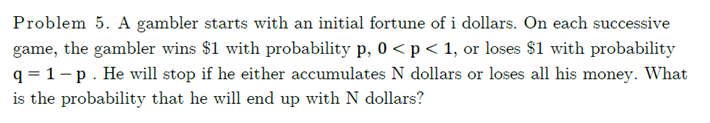

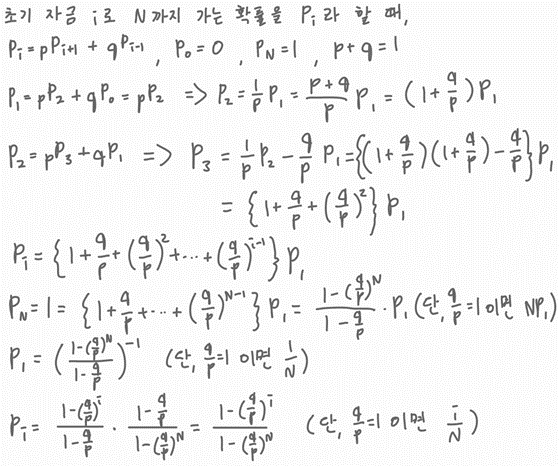

---

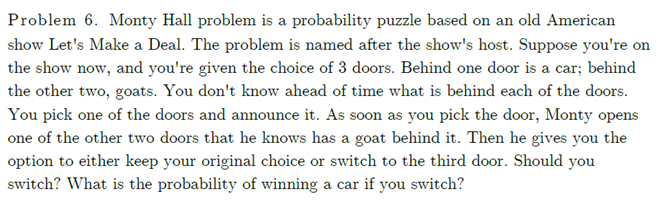

몬티는 내가 세 문 중 한 곳을 선택하자마자 염소가 있는 문을 열어주므로 선택을 바꾼다면,  
원래 염소가 있는 문을 선택했어야 차를 얻을 수 있고, 원래 차가 있는 문을 선택했다면 염소를 얻게 된다.  
따라서 차를 얻을 확률은 첫 선택에 염소를 선택할 확률과 같으므로 $\frac {2} {3}$가 된다. 

In [23]:
import numpy as np
import pandas as pd

# 3개의 문 뒤에는 염소 2마리와 차 1대가 있다.
door = [['염소', '염소', '차'] for i in range(10000)]

# 문 1개를 고른다.
first_pick = np.random.randint(0,3,10000)

# 고른 문을 제외하고 염소가 있는 문을 하나 열어준다. (제거한다.)
for i in range(len(door)):
    for j in range(3):
        if first_pick[i] != j and door[i][j] == '염소':
            door[i][j] = '제거'
            break

# 선택을 바꾼다.
change_pick = []
for i in range(len(door)):
    for j in range(3):
        if first_pick[i] != j and door[i][j] != '제거':
            change_pick.append(j)

# 바뀌었는지 확인
# print((change_pick == first_pick).sum())  

# 바꿔서 차를 얻는 상황 카운트
cnt = 0
for i in range(len(door)):
    if door[i][change_pick[i]] == '차':
        cnt += 1
        
# 확률 출력
print(cnt/len(door))

0.6667


---

## Problem 7

Solve the corresponding leetcode problem below and register the solution on GitHub.

You are given an integer array prices where prices[i] is the price of a given stock on the ith day.

On each day, you may decide to buy and/or sell the stock. You can only hold at most one share of the stock at any time. However, you can buy it then immediately sell it on the same day.

Find and return the maximum profit you can achieve.

In [1]:
class Solution(object):
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :rtype: int
        """
        rtn = 0
        for i in  range(len(prices)-1):
            if prices[i] > prices[i+1]:
                continue
            else:
                rtn += prices[i+1] - prices[i]
        return rtn

In [4]:
prices = [7,1,5,3,6,4]
Solution().maxProfit(prices)

7

---

## Problem 8

Solve the corresponding leetcode problem below and register the solution on GitHub.

Given a string s, find the first non-repeating character in it and return its index. If it does not exist, return -1.

In [5]:
class Solution(object):
    def firstUniqChar(self, s):
        """
        :type s: str
        :rtype: int
        """
        for i in range(len(s)):
            if s.count(s[i]) == 1:
                return i
            else:
                continue
        return -1

In [6]:
s = "leetcode"
Solution().firstUniqChar(s)

0

---